In [24]:
from google.colab import drive
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

drive.mount('/content/drive')

filename = '/content/drive/My Drive/TP FINAL LABORATORIO DE DATOS 2022/Datasets Kaggle/salarios_glassdoor_argentina_ordenado.csv'
df = pd.read_csv(filename)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Company,Position,Min Range (ARS/month),Average Salary (ARS/month),Max Range (ARS/month),Number of salaries informed,Min Range (USD/month),Average Salary (USD/month),Max Range (USD/month),Annual average salary (USD/year) (without bonuses and compensations),Seniority,URL
0,0,naranja,java dev,638000,663500.0,689000,1,2680.672269,2787.815126,2894.957983,33453.781513,Senior (4+ años de exp),https://www.glassdoor.com.ar/Sueldos/senior-ja...
1,2,ey,software architect,626000,653000.0,680000,1,2630.252101,2743.697479,2857.142857,32924.369748,Semisenior (2 a 4 años de exp),https://www.glassdoor.com.ar/Sueldos/software-...
2,3,mercado libre,project leader,609000,633500.0,658000,1,2558.823529,2661.764706,2764.705882,31941.176471,Senior (4+ años de exp),https://www.glassdoor.com.ar/Sueldos/senior-pr...
3,4,rappi,ml engineer,595000,621000.0,647000,1,2500.000000,2609.243697,2718.487395,31310.924370,Senior (4+ años de exp),https://www.glassdoor.com.ar/Sueldos/senior-ma...
4,5,rappi,ml engineer,595000,620500.0,646000,1,2500.000000,2607.142857,2714.285714,31285.714286,Semisenior (2 a 4 años de exp),https://www.glassdoor.com.ar/Sueldos/machine-l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1369,2882,freelance,design,30000,64037.0,102000,15,126.050420,269.063025,428.571429,3228.756303,Junior (0 a 2 años de exp),https://www.glassdoor.com.ar/Sueldos/junior-di...
1370,2883,freelance,design,30000,64037.0,102000,15,126.050420,269.063025,428.571429,3228.756303,Junior (0 a 2 años de exp),https://www.glassdoor.com.ar/Sueldos/junior-de...
1371,2884,freelance,ux design,61000,64000.0,67000,1,256.302521,268.907563,281.512605,3226.890756,Junior (0 a 2 años de exp),https://www.glassdoor.com.ar/Sueldos/junior-de...
1372,2886,ey,data analyst,60000,63000.0,66000,1,252.100840,264.705882,277.310924,3176.470588,Junior (0 a 2 años de exp),https://www.glassdoor.com.ar/Sueldos/junior-an...


In [25]:
df['Position'].value_counts()

ux design                208
frontend                  96
backend                   96
data scientist            87
dba                       68
tester                    66
data analyst              58
project manager           56
software developer        52
technical leader          45
sysadmin                  43
cobol dev                 37
scrum master              37
product owner             36
software architect        34
data engineer             34
data architect            34
consultant                33
python dev                31
ml engineer               28
design                    27
business intelligence     27
functional analyst        24
java dev                  24
project leader            24
devops                    21
fullstack                 20
js dev                    17
software engineer         11
Name: Position, dtype: int64

In [26]:
df['Seniority'].value_counts()

Semisenior (2 a 4 años de exp)    484
Senior (4+ años de exp)           452
Junior (0 a 2 años de exp)        438
Name: Seniority, dtype: int64

In [27]:
df['Company'].value_counts()

globant                         223
accenture                       139
mercado libre                   132
ibm                              95
freelance                        62
telecom argentina                42
globallogic                      39
bbva                             38
ey                               33
despegar.com                     33
santander                        30
gobierno caba                    29
telefonica                       29
banco galicia                    29
dxc technology                   28
intive                           25
j.p. morgan                      25
prisma medios de pago            23
cognizant                        21
practia                          21
baufest                          20
hexacta                          20
softtek                          19
pwc                              19
neoris                           19
exxonmobil                       18
naranja                          17
claro                       

In [28]:
df_company=df.groupby(by='Company')
df_company=df_company.mean()
df_company=df_company.sort_values("Annual average salary (USD/year) (without bonuses and compensations)",ascending=False)
df_company= df_company["Annual average salary (USD/year) (without bonuses and compensations)"]
df_company #Se ve que Rappi es top 1, lo cual es de esperar, ya que paga parte de su sueldo en dólares, jaja

Company
rappi                           16764.122899
santander                       15663.899160
naranja                         15266.725655
exxonmobil                      14902.574230
j.p. morgan                     14244.171429
uala                            13174.914483
mercado libre                   13145.259358
despegar.com                    12413.938885
mobile computing (argentina)    12168.592437
media.monks                     11976.031513
banco galicia                   11790.262533
hexacta                         11596.212605
intive                          11425.643697
telecom argentina               11078.274910
prisma medios de pago           10961.177932
cognizant                       10084.336134
telefonica                      10012.570849
baufest                          9932.273950
ey                               9454.218487
bbva                             9383.307386
globallogic                      9312.511959
pwc                              9303.433879
pr

AxesSubplot(0.125,0.125;0.775x0.755)


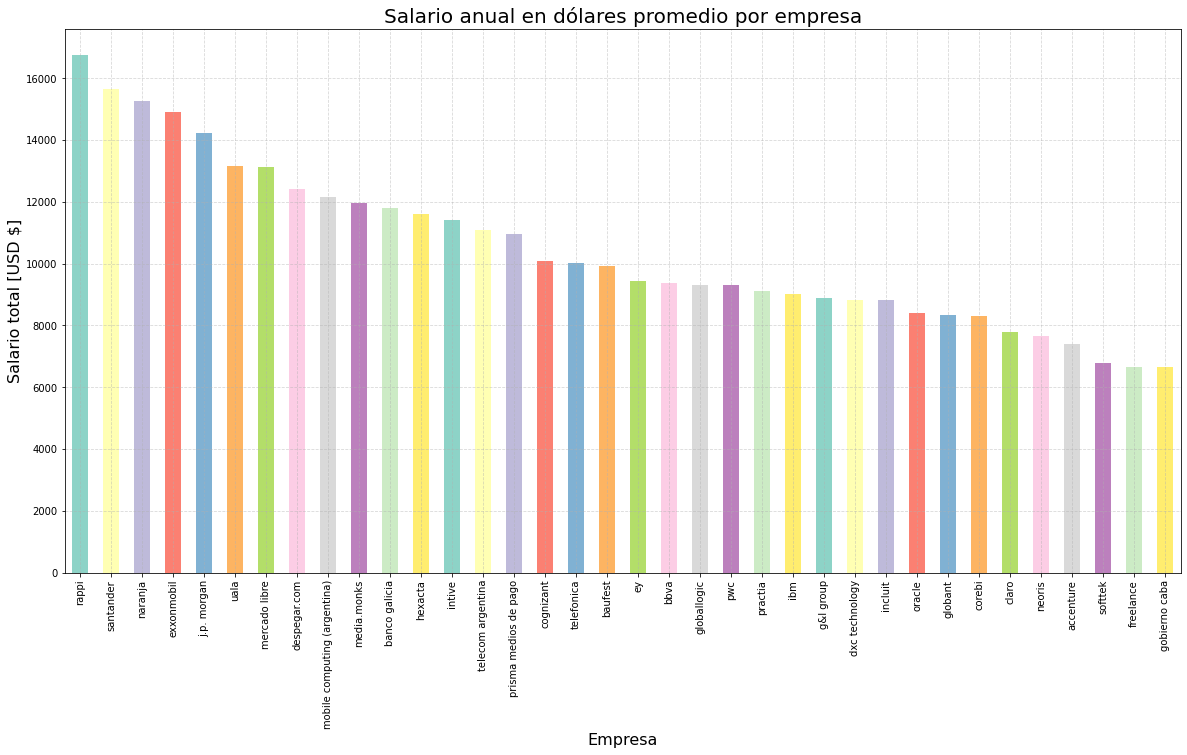

In [29]:
plt.figure(figsize=(30,10))
axes = df_company.plot.bar(figsize=(20, 10),color = plt.get_cmap('Set3').colors)
axes.set_title('Salario anual en dólares promedio por empresa',fontsize='20')
axes.set_xlabel('Empresa',fontsize=16)
axes.set_ylabel('Salario total [USD $]',fontsize=16)
axes.grid('on', linestyle = 'dashed', alpha = 0.5)
print(axes)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


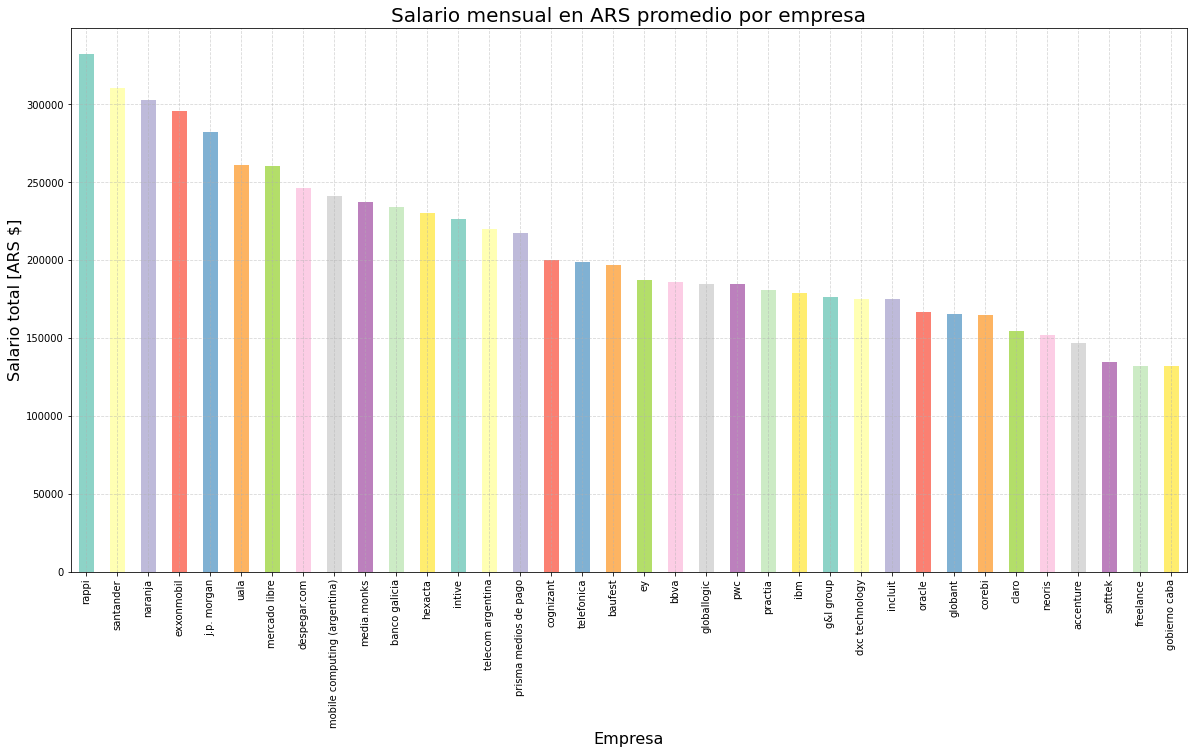

In [30]:
df_company_ars_mensual=df.groupby(by='Company')
df_company_ars_mensual=df_company_ars_mensual.mean()
df_company_ars_mensual=df_company_ars_mensual.sort_values("Average Salary (ARS/month)",ascending=False)
df_company_ars_mensual = df_company_ars_mensual["Average Salary (ARS/month)"]

plt.figure(figsize=(30,10))
axes = df_company_ars_mensual.plot.bar(figsize=(20, 10),color = plt.get_cmap('Set3').colors)
axes.set_title('Salario mensual en ARS promedio por empresa',fontsize='20')
axes.set_xlabel('Empresa',fontsize=16)
axes.set_ylabel('Salario total [ARS $]',fontsize=16)
axes.grid('on', linestyle = 'dashed', alpha = 0.5)
print(axes)
plt.show()

In [31]:
df_seniority=df.groupby(by='Seniority')
df_seniority=df_seniority.mean()
df_seniority=df_seniority.sort_values("Annual average salary (USD/year) (without bonuses and compensations)",ascending=False)
df_seniority= df_seniority["Annual average salary (USD/year) (without bonuses and compensations)"]
df_seniority

Seniority
Senior (4+ años de exp)           11994.832044
Semisenior (2 a 4 años de exp)    10536.522328
Junior (0 a 2 años de exp)         7052.143318
Name: Annual average salary (USD/year) (without bonuses and compensations), dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


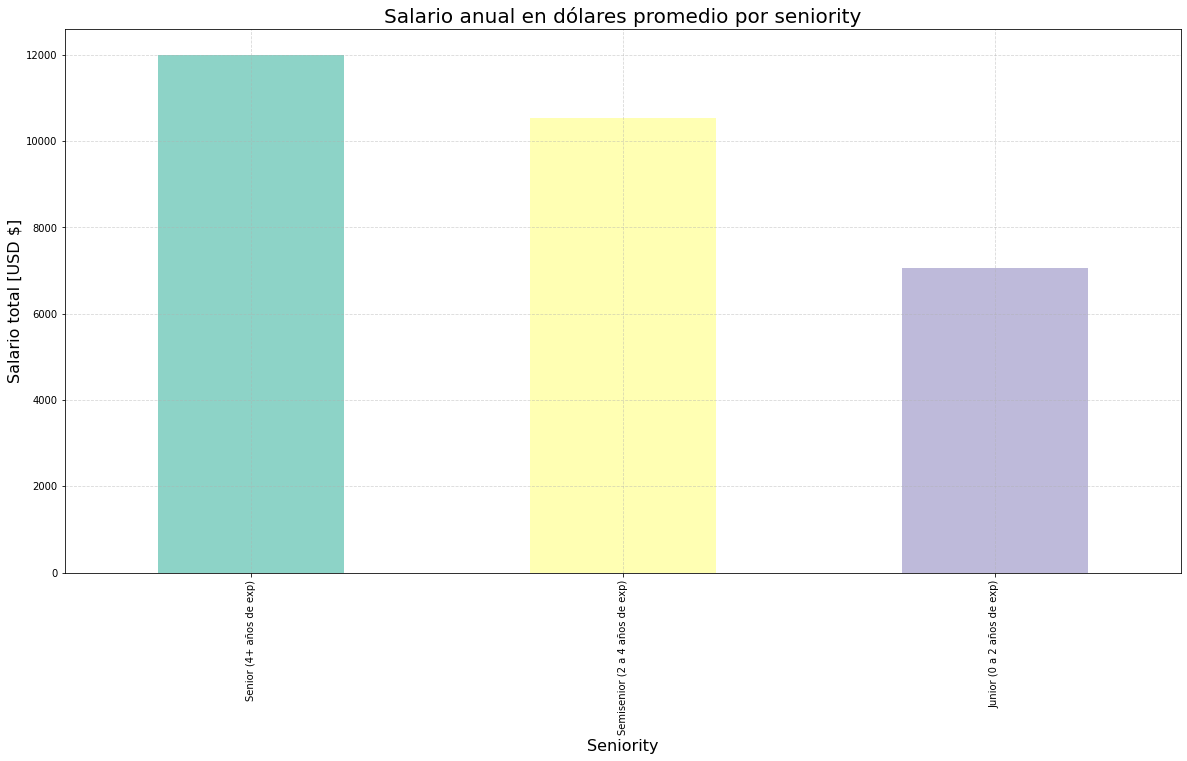

In [32]:
plt.figure(figsize=(30,10))
axes = df_seniority.plot.bar(figsize=(20, 10),color = plt.get_cmap('Set3').colors)
axes.set_title('Salario anual en dólares promedio por seniority',fontsize='20')
axes.set_xlabel('Seniority',fontsize=16)
axes.set_ylabel('Salario total [USD $]',fontsize=16)
axes.grid('on', linestyle = 'dashed', alpha = 0.5)
print(axes)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


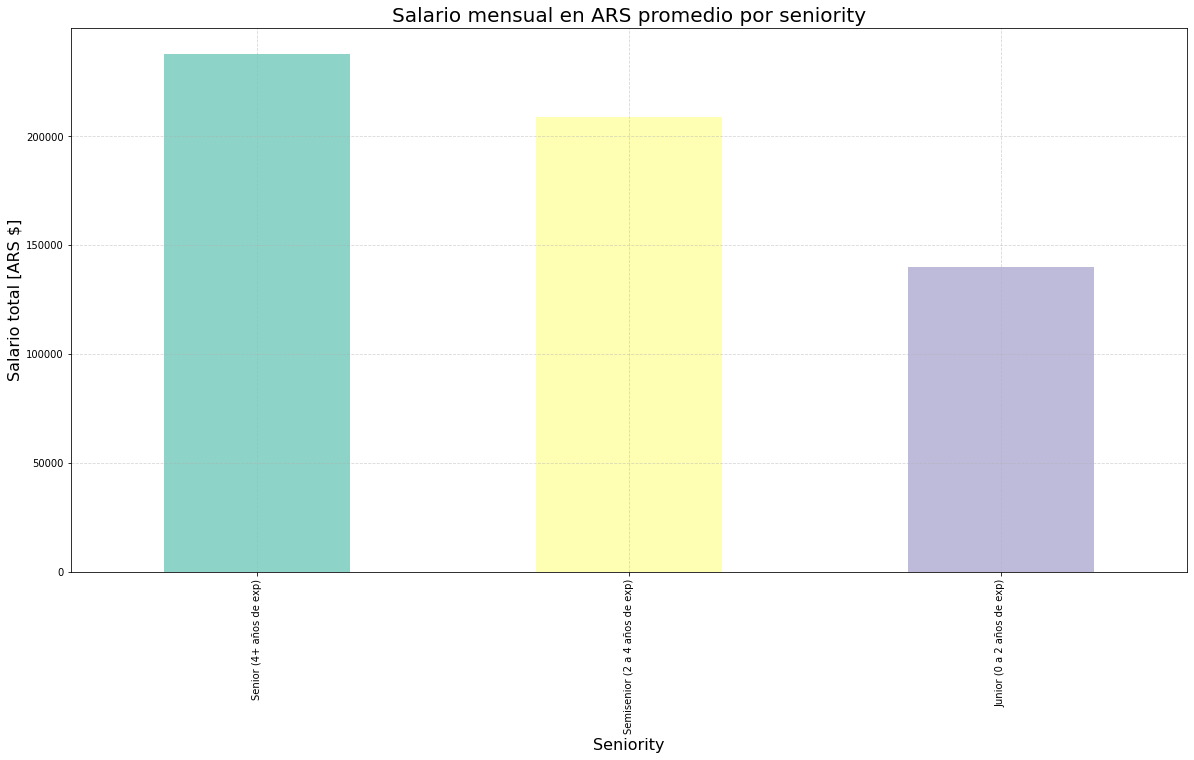

In [33]:
df_seniority_ars_mensual=df.groupby(by='Seniority')
df_seniority_ars_mensual=df_seniority_ars_mensual.mean()
df_seniority_ars_mensual=df_seniority_ars_mensual.sort_values("Average Salary (ARS/month)",ascending=False)
df_seniority_ars_mensual = df_seniority_ars_mensual["Average Salary (ARS/month)"]

plt.figure(figsize=(30,10))
axes = df_seniority_ars_mensual.plot.bar(figsize=(20, 10),color = plt.get_cmap('Set3').colors)
axes.set_title('Salario mensual en ARS promedio por seniority',fontsize='20')
axes.set_xlabel('Seniority',fontsize=16)
axes.set_ylabel('Salario total [ARS $]',fontsize=16)
axes.grid('on', linestyle = 'dashed', alpha = 0.5)
print(axes)
plt.show()

In [34]:
df_position=df.groupby(by='Position')
df_position=df_position.mean()
df_position=df_position.sort_values("Annual average salary (USD/year) (without bonuses and compensations)",ascending=False)
df_position= df_position["Annual average salary (USD/year) (without bonuses and compensations)"]
df_position

Position
project leader           16125.394958
software engineer        15614.236822
data architect           15337.936728
software architect       15127.352447
ml engineer              14683.120048
technical leader         14314.436975
data engineer            11759.509145
project manager          11190.683373
scrum master             11100.600954
java dev                 10914.926471
product owner            10912.610644
python dev               10597.919219
data scientist           10354.049841
backend                  10336.955357
sysadmin                 10213.063514
frontend                  9744.499475
software developer        9168.840659
functional analyst        8760.600840
dba                       8751.193524
fullstack                 8529.471429
cobol dev                 8472.825801
business intelligence     8410.750700
data analyst              8140.430890
ux design                 8055.860294
devops                    7984.134454
consultant                7223.941940
tes

AxesSubplot(0.125,0.125;0.775x0.755)


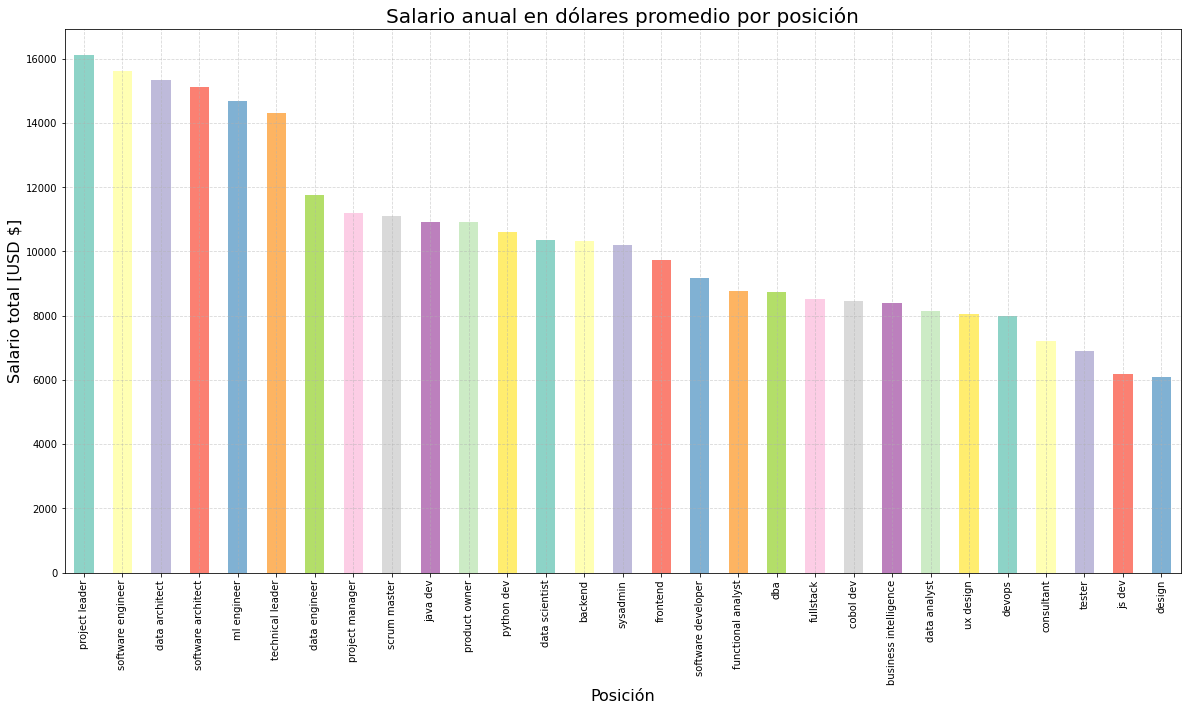

In [35]:
plt.figure(figsize=(30,10))
axes = df_position.plot.bar(figsize=(20, 10),color = plt.get_cmap('Set3').colors)
axes.set_title('Salario anual en dólares promedio por posición',fontsize='20')
axes.set_xlabel('Posición',fontsize=16)
axes.set_ylabel('Salario total [USD $]',fontsize=16)
axes.grid('on', linestyle = 'dashed', alpha = 0.5)
print(axes)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


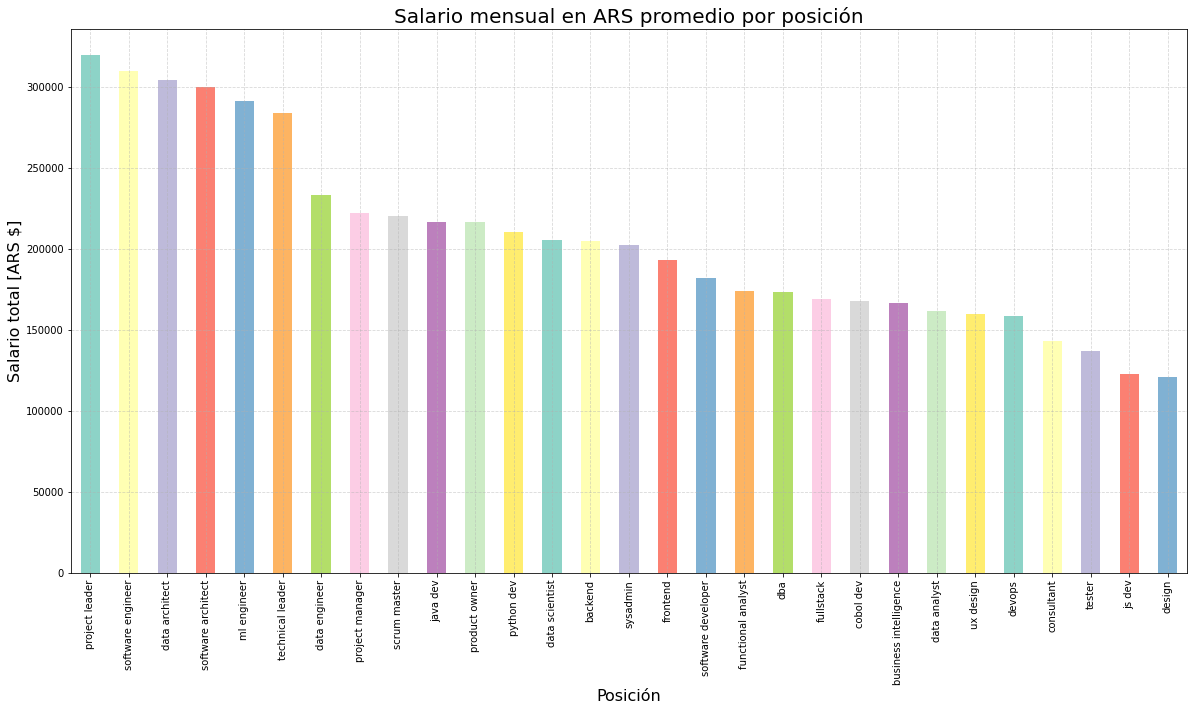

In [36]:
df_position_ars_mensual=df.groupby(by='Position')
df_position_ars_mensual=df_position_ars_mensual.mean()
df_position_ars_mensual=df_position_ars_mensual.sort_values("Average Salary (ARS/month)",ascending=False)
df_position_ars_mensual = df_position_ars_mensual["Average Salary (ARS/month)"]

plt.figure(figsize=(30,10))
axes = df_position_ars_mensual.plot.bar(figsize=(20, 10),color = plt.get_cmap('Set3').colors)
axes.set_title('Salario mensual en ARS promedio por posición',fontsize='20')
axes.set_xlabel('Posición',fontsize=16)
axes.set_ylabel('Salario total [ARS $]',fontsize=16)
axes.grid('on', linestyle = 'dashed', alpha = 0.5)
print(axes)
plt.show()

Podemos ver si hay relaciones más escondidas, mirando gráficos de dos variables contra una, por ejemplo.

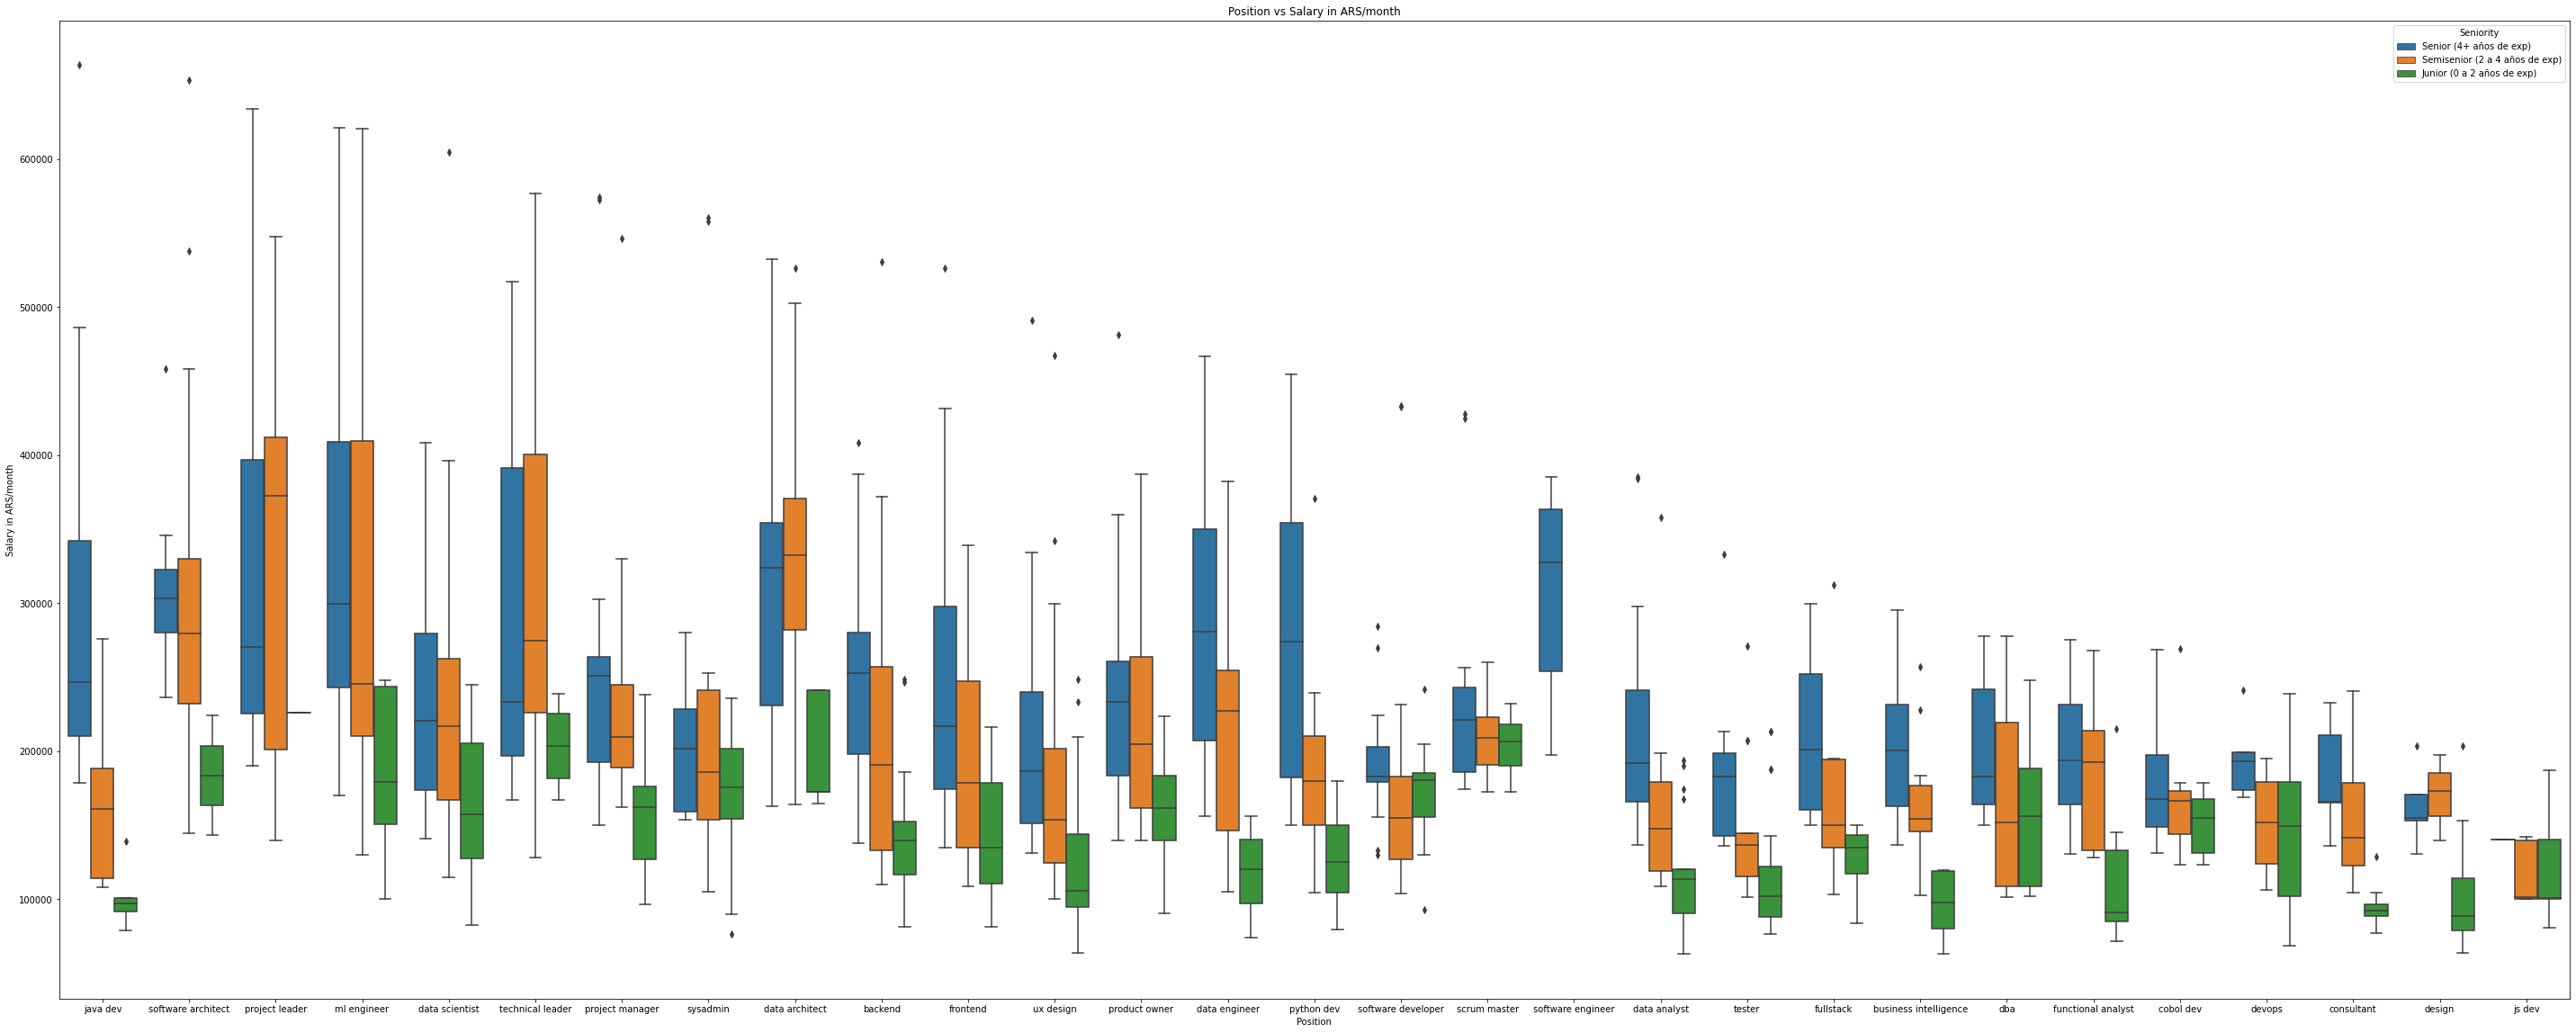

In [37]:
df.sort_values("Average Salary (ARS/month)",ascending=False)
# plotting strip plot with seaborn
plt.figure(figsize=(50,20))
ax = sns.boxplot(x=df['Position'],y=df["Average Salary (ARS/month)"], hue=df["Seniority"])
 
# giving labels to x-axis and y-axis
ax.set(xlabel ='Position', ylabel ='Salary in ARS/month')
 
# giving title to the plot
plt.title('Position vs Salary in ARS/month')
 
# function to show plot
plt.show()

# NO se entiende nada

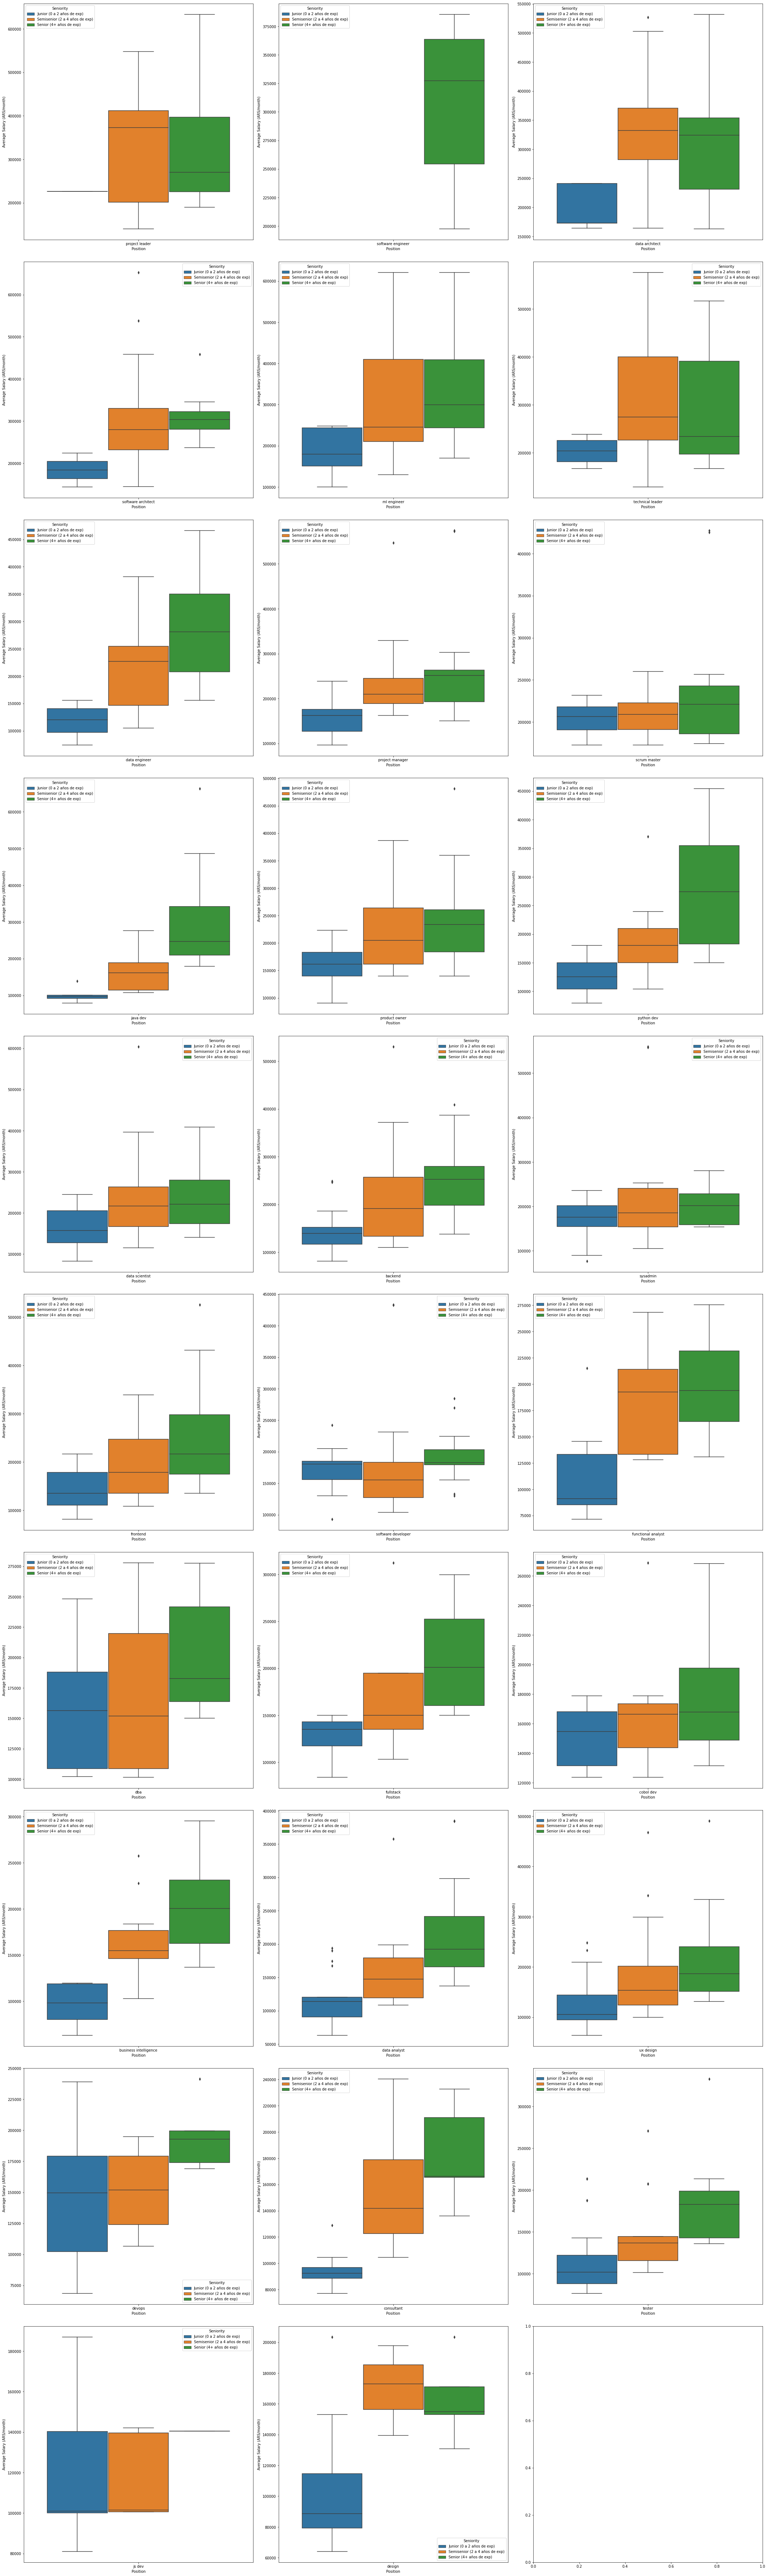

In [38]:
# Veamos Posición y seniority vs salario

fig, axs = plt.subplots(nrows=10,ncols=3,figsize=(30,100))
fig.tight_layout(pad=4)
positions = ["project leader",
"software engineer",
"data architect",
"software architect",
"ml engineer",
"technical leader",
"data engineer",
'project manager',
'scrum master',
'java dev',
'product owner',
'python dev',
'data scientist',
'backend',
'sysadmin',
'frontend',
'software developer',
'functional analyst',
'dba',
'fullstack',
'cobol dev',
'business intelligence',
'data analyst',
'ux design',
'devops',
'consultant',
'tester',
'js dev',
'design']

i=0
j=0
while i<10 and j<len(positions):
  try:
    aux = df[df['Position'] == positions[j]]
    sns.boxplot(x=aux['Position'], y=aux['Average Salary (ARS/month)'], hue=aux['Seniority'], hue_order=["Junior (0 a 2 años de exp)", "Semisenior (2 a 4 años de exp)", "Senior (4+ años de exp)"], ax=axs[i][0])
    ax.set(xlabel =positions[j], ylabel ='Salary in ARS/month')
    ax.title(f'{positions[j]} vs Salary in ARS/month')
  except:
    pass

  try:
    aux = df[df['Position'] == positions[j+1]]
    sns.boxplot(x=aux['Position'], y=aux['Average Salary (ARS/month)'], hue=aux['Seniority'], hue_order=["Junior (0 a 2 años de exp)", "Semisenior (2 a 4 años de exp)", "Senior (4+ años de exp)"],ax=axs[i][1])
    ax.set(xlabel =positions[j+1], ylabel ='Salary in ARS/month')
    ax.title(f'{positions[j+1]} vs Salary in ARS/month')
  except:
    pass

  try:
    aux = df[df['Position'] == positions[j+2]]
    sns.boxplot(x=aux['Position'], y=aux['Average Salary (ARS/month)'], hue=aux['Seniority'], hue_order=["Junior (0 a 2 años de exp)", "Semisenior (2 a 4 años de exp)", "Senior (4+ años de exp)"],ax=axs[i][2])
    ax.set(xlabel =positions[j+2], ylabel ='Salary in ARS/month')
    ax.title(f'{positions[j+2]} vs Salary in ARS/month')
  except:
    pass

  i = i+1
  j = j+3

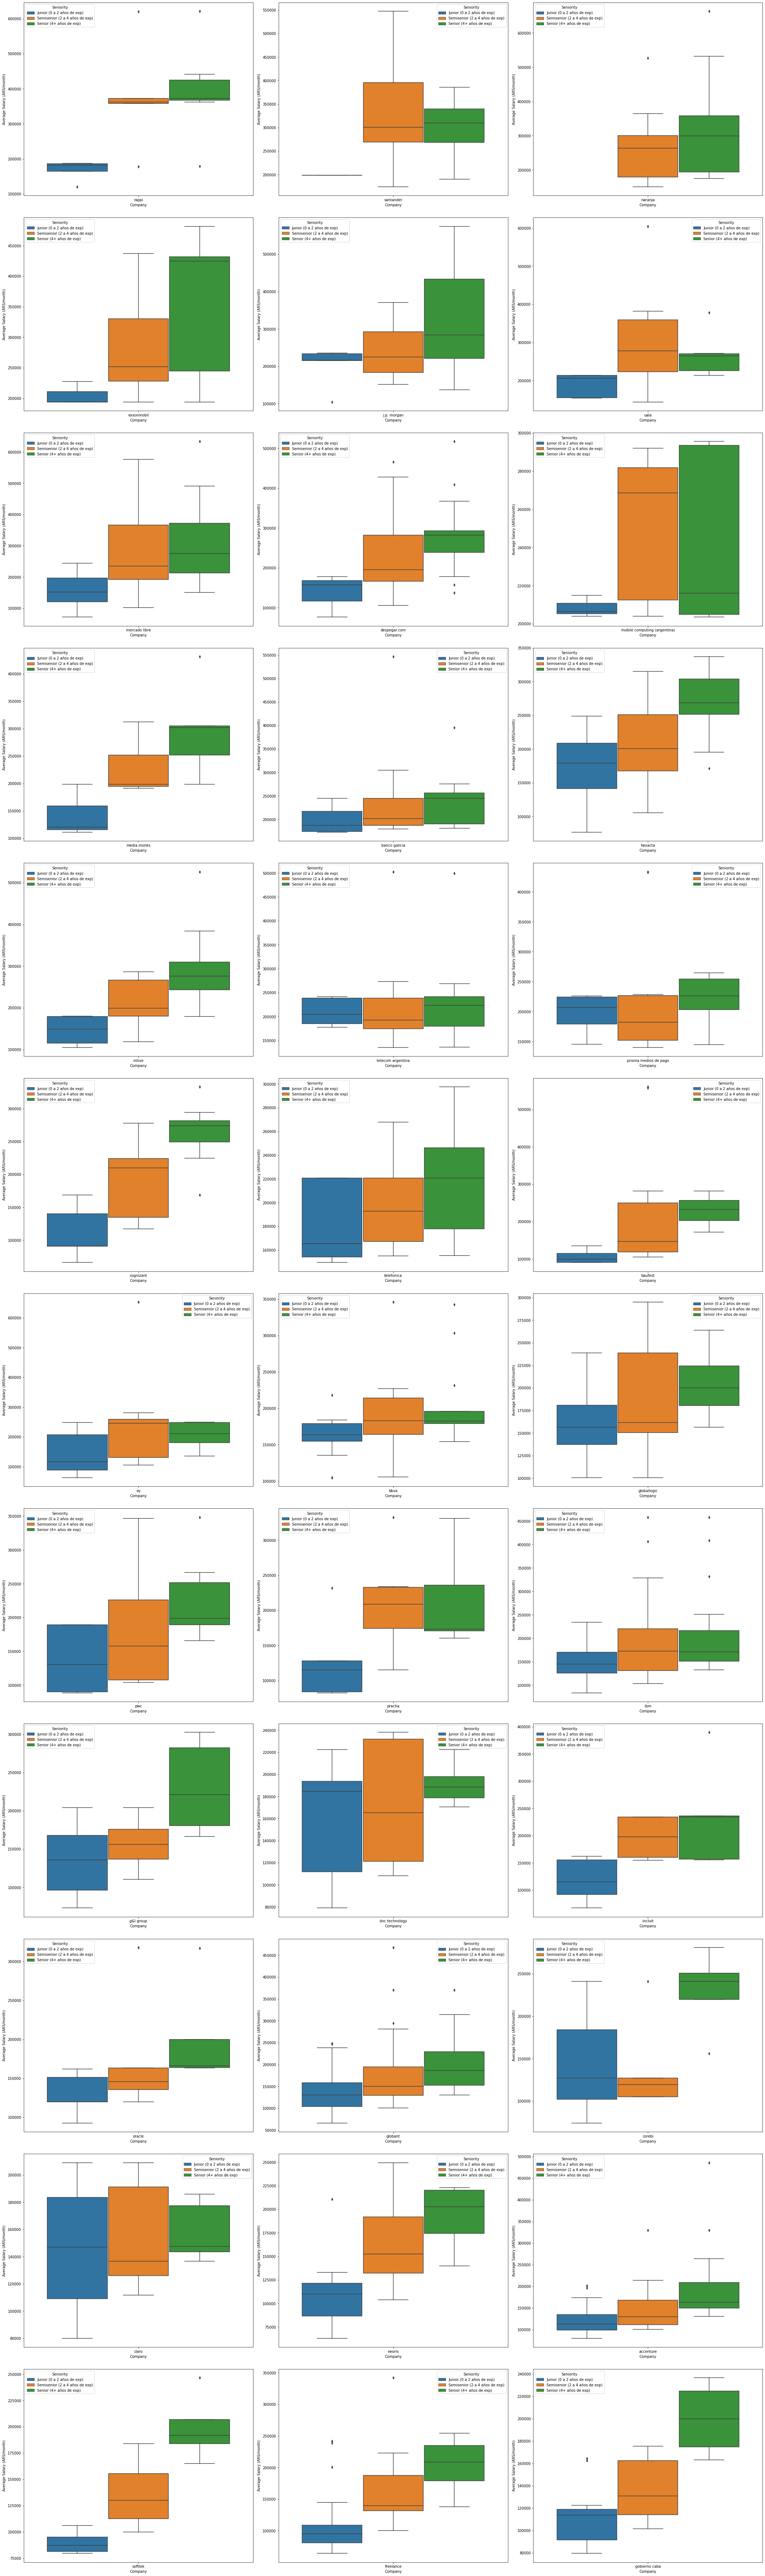

In [39]:
# Ahora veamos Empresa y seniority vs salario

fig, axs = plt.subplots(nrows=12,ncols=3,figsize=(30,100))
fig.tight_layout(pad=4)
company = ['rappi',
'santander',
'naranja',
'exxonmobil',
'j.p. morgan',
'uala',
'mercado libre',
'despegar.com',
'mobile computing (argentina)',
'media.monks',
'banco galicia',
'hexacta',
'intive',
'telecom argentina',
'prisma medios de pago',
'cognizant',
'telefonica',
'baufest',
'ey',
'bbva',
'globallogic',
'pwc',
'practia',
'ibm',
'g&l group',
'dxc technology',
'incluit',
'oracle',
'globant',
'corebi',
'claro',
'neoris',
'accenture',
'softtek',
'freelance',
'gobierno caba']

i=0
j=0
while i<12 and j<len(company):
  try:
    aux = df[df['Company'] == company[j]]
    sns.boxplot(x=aux['Company'], y=aux['Average Salary (ARS/month)'], hue=aux['Seniority'], hue_order=["Junior (0 a 2 años de exp)", "Semisenior (2 a 4 años de exp)", "Senior (4+ años de exp)"], ax=axs[i][0])
    ax.set(xlabel =company[j], ylabel ='Salary in ARS/month')
    ax.title(f'{company[j]} vs Salary in ARS/month')
  except:
    pass

  try:
    aux = df[df['Company'] == company[j+1]]
    sns.boxplot(x=aux['Company'], y=aux['Average Salary (ARS/month)'], hue=aux['Seniority'], hue_order=["Junior (0 a 2 años de exp)", "Semisenior (2 a 4 años de exp)", "Senior (4+ años de exp)"],ax=axs[i][1])
    ax.set(xlabel =company[j+1], ylabel ='Salary in ARS/month')
    ax.title(f'{company[j+1]} vs Salary in ARS/month')
  except:
    pass

  try:
    aux = df[df['Company'] == company[j+2]]
    sns.boxplot(x=aux['Company'], y=aux['Average Salary (ARS/month)'], hue=aux['Seniority'], hue_order=["Junior (0 a 2 años de exp)", "Semisenior (2 a 4 años de exp)", "Senior (4+ años de exp)"],ax=axs[i][2])
    ax.set(xlabel =company[j+2], ylabel ='Salary in ARS/month')
    ax.title(f'{company[j+2]} vs Salary in ARS/month')
  except:
    pass

  i = i+1
  j = j+3

Text(0.5, 1.0, 'Salario por compañia y seniority')

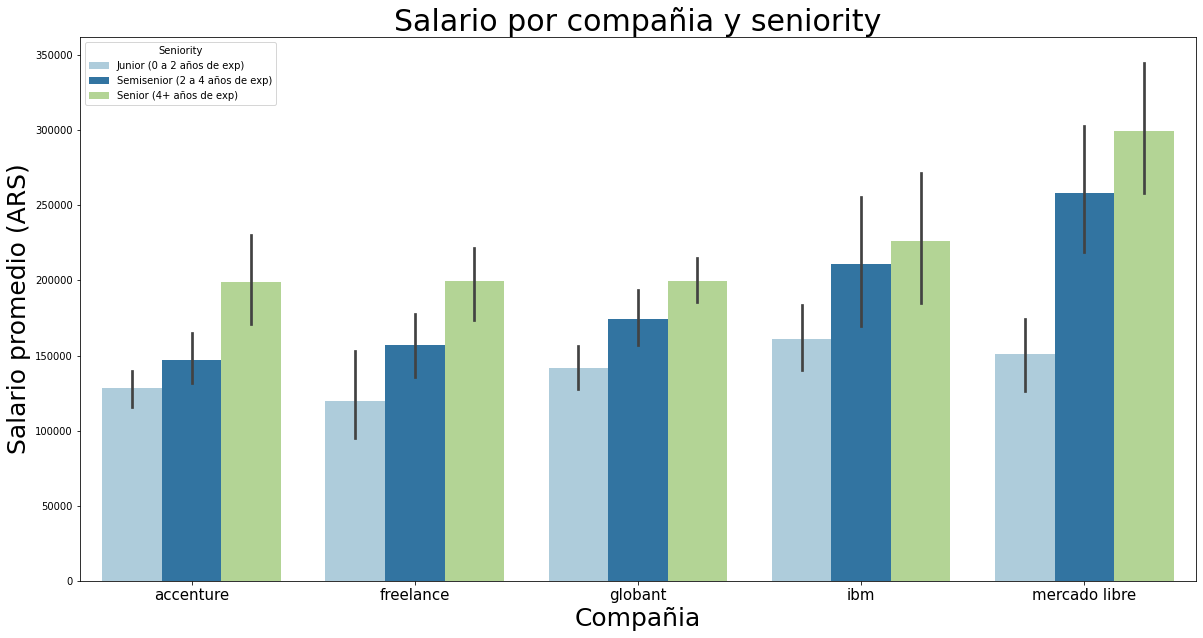

In [40]:
# Tomamos las 5 companias más representativas del mercado argentino
aux1 = df[df['Company'].str.contains('globant')]
aux2 = df[df['Company'].str.contains('accenture')]
aux3 = df[df['Company'].str.contains('mercado libre')]
aux4 = df[df['Company'].str.contains('ibm')]
aux5 = df[df['Company'].str.contains('freelance')]

list_aux = [aux1,aux2,aux3,aux4,aux5]

aux = pd.concat(list_aux)

fig,ax = plt.subplots(figsize=(20,10))
df_l=aux.groupby(["Company","Seniority","Position"]).mean()
df_l=df_l.reset_index()

ax = sns.barplot(x="Company", y="Average Salary (ARS/month)", data=df_l,hue="Seniority",palette = "Paired")
ax.set_xlabel("Compañia",fontsize=25)
ax.set_ylabel("Salario promedio (ARS)",fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0,fontsize=15)
ax.set_title("Salario por compañia y seniority",fontsize=30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Salario por compañia y posición')

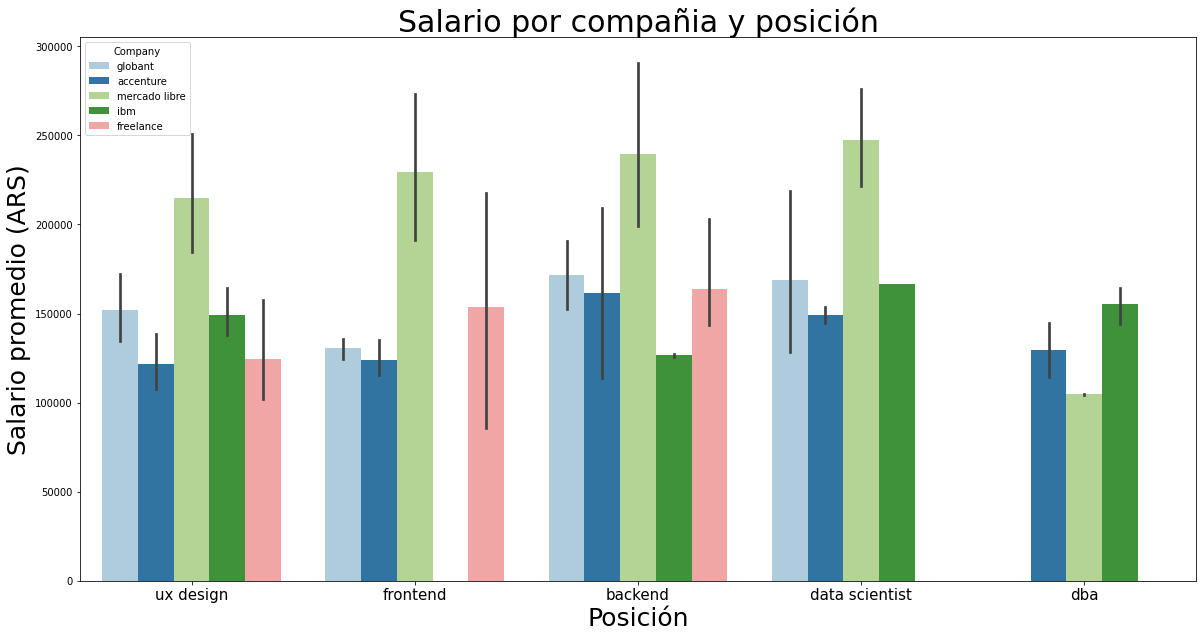

In [41]:
# Tomamos las 5 posiciones más representativas del mercado argentino
aux1 = aux[aux['Position'].str.contains('ux design')]
aux2 = aux[aux['Position'].str.contains('frontend')]
aux3 = aux[df['Position'].str.contains('backend')]
aux4 = aux[aux['Position'].str.contains('data scientist')]
aux5 = aux[aux['Position'].str.contains('dba')]

fig,ax = plt.subplots(figsize=(20,10))

list_aux = [aux1,aux2,aux3,aux4,aux5]

aux = pd.concat(list_aux)

ax = sns.barplot(x="Position", y="Average Salary (ARS/month)", data=aux,hue="Company",palette = "Paired")
ax.set_xlabel("Posición",fontsize=25)
ax.set_ylabel("Salario promedio (ARS)",fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0,fontsize=15)
ax.set_title("Salario por compañia y posición",fontsize=30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


Text(31.20000000000003, 0.5, 'Salario promedio (ARS)')

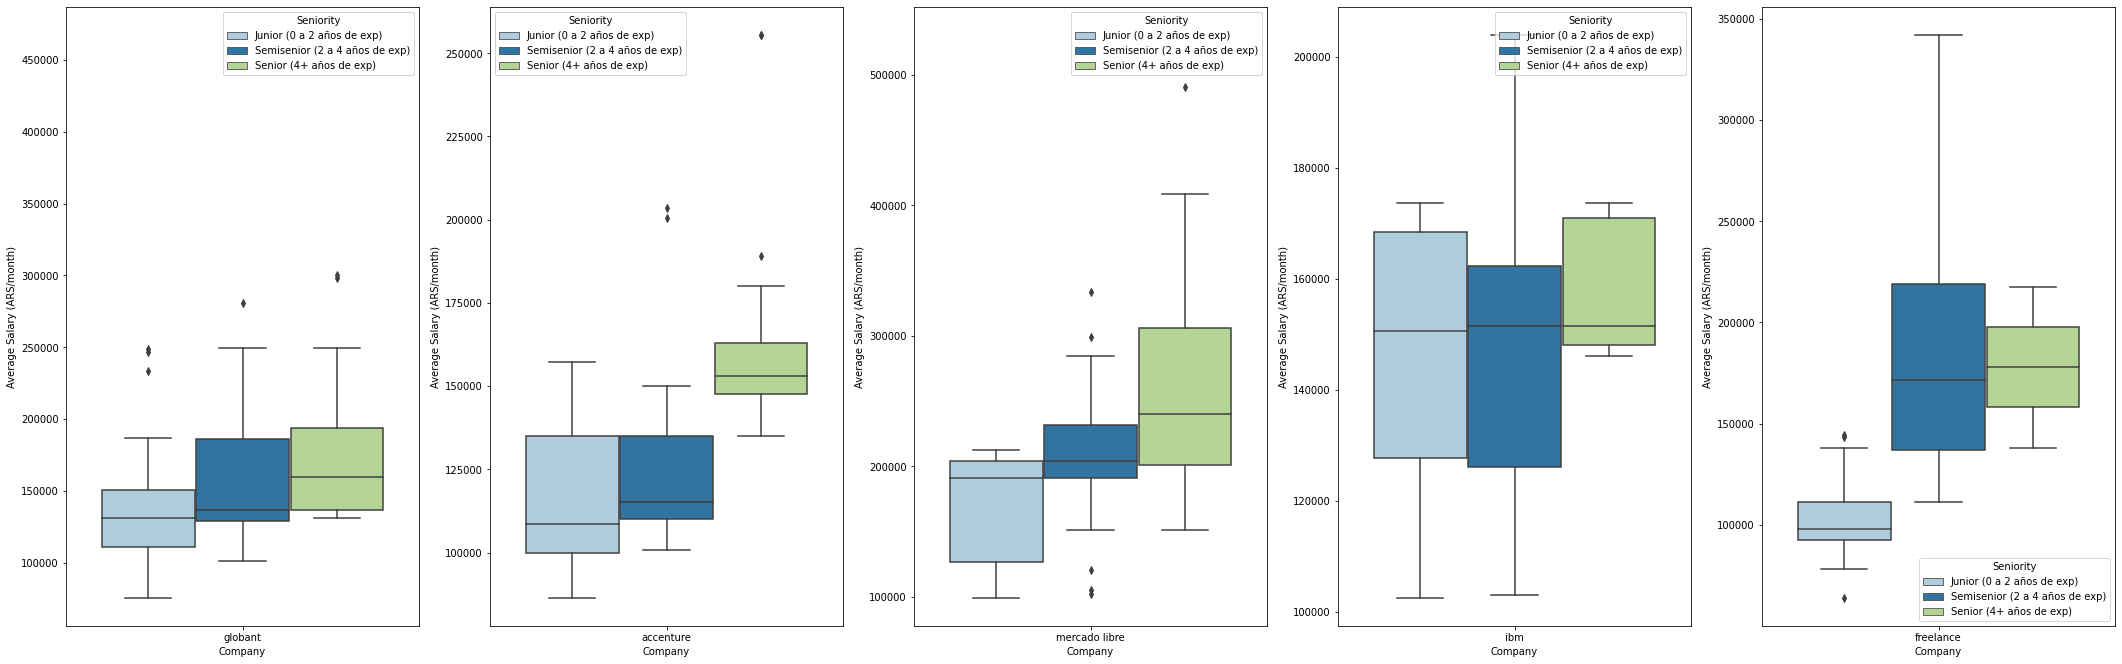

In [42]:
# Ahora veamos Empresa y seniority vs salario
aux1 = df[df['Company'].str.contains('globant')]
aux2 = df[df['Company'].str.contains('accenture')]
aux3 = df[df['Company'].str.contains('mercado libre')]
aux4 = df[df['Company'].str.contains('ibm')]
aux5 = df[df['Company'].str.contains('freelance')]
list_aux = [aux1,aux2,aux3,aux4,aux5]
temp = pd.concat(list_aux)
aux1 = aux[aux['Position'].str.contains('ux design')]
aux2 = aux[aux['Position'].str.contains('frontend')]
aux3 = aux[df['Position'].str.contains('backend')]
aux4 = aux[aux['Position'].str.contains('data scientist')]
aux5 = aux[aux['Position'].str.contains('dba')]
list_aux = [aux1,aux2,aux3,aux4,aux5]
temp = pd.concat(list_aux)

fig, axs = plt.subplots(nrows=1,ncols=5,figsize=(30,10))
fig.tight_layout(pad=4)
company = ['globant','accenture','mercado libre','ibm','freelance']

i=0
j=0

#try:
tmp = temp[temp['Company'] == company[j]]
sns.boxplot(x=tmp['Company'], y=tmp['Average Salary (ARS/month)'], hue=tmp['Seniority'], hue_order=["Junior (0 a 2 años de exp)", "Semisenior (2 a 4 años de exp)", "Senior (4+ años de exp)"], palette = "Paired",ax=axs[j])
ax.set_xlabel(company[j],fontsize=30)
ax.set_ylabel("Salario promedio (ARS)",fontsize=30)
#ax.set(xlabel = company[j], ylabel ='Salary in ARS/month')
#ax.title(f'{company[j]} vs Salary in ARS/month')
#except:
  #pass

#try:
tmp = temp[temp['Company'] == company[j+1]]
sns.boxplot(x=tmp['Company'], y=tmp['Average Salary (ARS/month)'], hue=tmp['Seniority'], hue_order=["Junior (0 a 2 años de exp)", "Semisenior (2 a 4 años de exp)", "Senior (4+ años de exp)"],palette = "Paired",ax=axs[j+1])
ax.set_xlabel(company[j+1],fontsize=30)
ax.set_ylabel("Salario promedio (ARS)",fontsize=30)
#ax.title(f'{company[j+1]} vs Salary in ARS/month')
#except:
#  pass

#try:
tmp = temp[temp['Company'] == company[j+2]]
sns.boxplot(x=tmp['Company'], y=tmp['Average Salary (ARS/month)'], hue=tmp['Seniority'], hue_order=["Junior (0 a 2 años de exp)", "Semisenior (2 a 4 años de exp)", "Senior (4+ años de exp)"],palette = "Paired",ax=axs[j+2])
ax.set_xlabel(company[j+2],fontsize=30)
ax.set_ylabel("Salario promedio (ARS)",fontsize=30)
#ax.title(f'{company[j+2]} vs Salary in ARS/month')
#except:
  #pass
  
#try:
tmp = temp[temp['Company'] == company[j+3]]
sns.boxplot(x=tmp['Company'], y=tmp['Average Salary (ARS/month)'], hue=tmp['Seniority'], hue_order=["Junior (0 a 2 años de exp)", "Semisenior (2 a 4 años de exp)", "Senior (4+ años de exp)"],palette = "Paired",ax=axs[j+3])
ax.set_xlabel(company[j+3],fontsize=30)
ax.set_ylabel("Salario promedio (ARS)",fontsize=30)
#ax.title(f'{company[j+3]} vs Salary in ARS/month')
#except:
  #pass
  
#try:
tmp = temp[temp['Company'] == company[j+4]]
sns.boxplot(x=tmp['Company'], y=tmp['Average Salary (ARS/month)'], hue=tmp['Seniority'], hue_order=["Junior (0 a 2 años de exp)", "Semisenior (2 a 4 años de exp)", "Senior (4+ años de exp)"],palette = "Paired",ax=axs[j+4])
ax.set_xlabel(company[j+4],fontsize=30)
ax.set_ylabel("Salario promedio (ARS)",fontsize=30)
#ax.title(f'{company[j+4]} vs Salary in ARS/month')
#except:
  #pass

In [43]:
df_l=aux.groupby(["Company","Seniority"])

df_val_count = pd.DataFrame({'count' : aux.groupby( ["Company","Seniority"] ).size()}).reset_index()

df_val_count #N de empleados por seniority

,Company,Seniority,count
0,accenture,Junior (0 a 2 años de exp),27
1,accenture,Semisenior (2 a 4 años de exp),20
2,accenture,Senior (4+ años de exp),16
3,freelance,Junior (0 a 2 años de exp),16
4,freelance,Semisenior (2 a 4 años de exp),8
5,freelance,Senior (4+ años de exp),2
6,globant,Junior (0 a 2 años de exp),42
7,globant,Semisenior (2 a 4 años de exp),25
8,globant,Senior (4+ años de exp),28
9,ibm,Junior (0 a 2 años de exp),15


Text(0.5, 1.0, 'Cantidad de empleados por seniority')

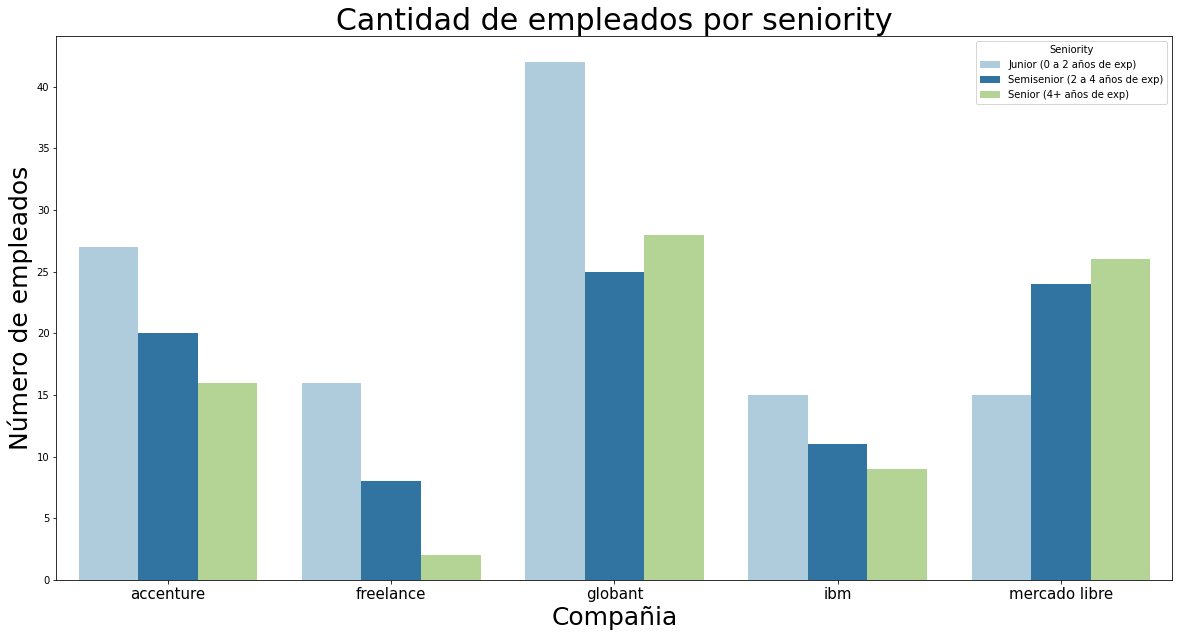

In [44]:
fig,ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(x="Company", y="count", data=df_val_count,hue="Seniority",palette = "Paired")
ax.set_xlabel("Compañia",fontsize=25)
ax.set_ylabel("Número de empleados",fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0,fontsize=15)
ax.set_title("Cantidad de empleados por seniority",fontsize=30)

Text(0.5, 1.0, 'Cantidad de empleados por posición')

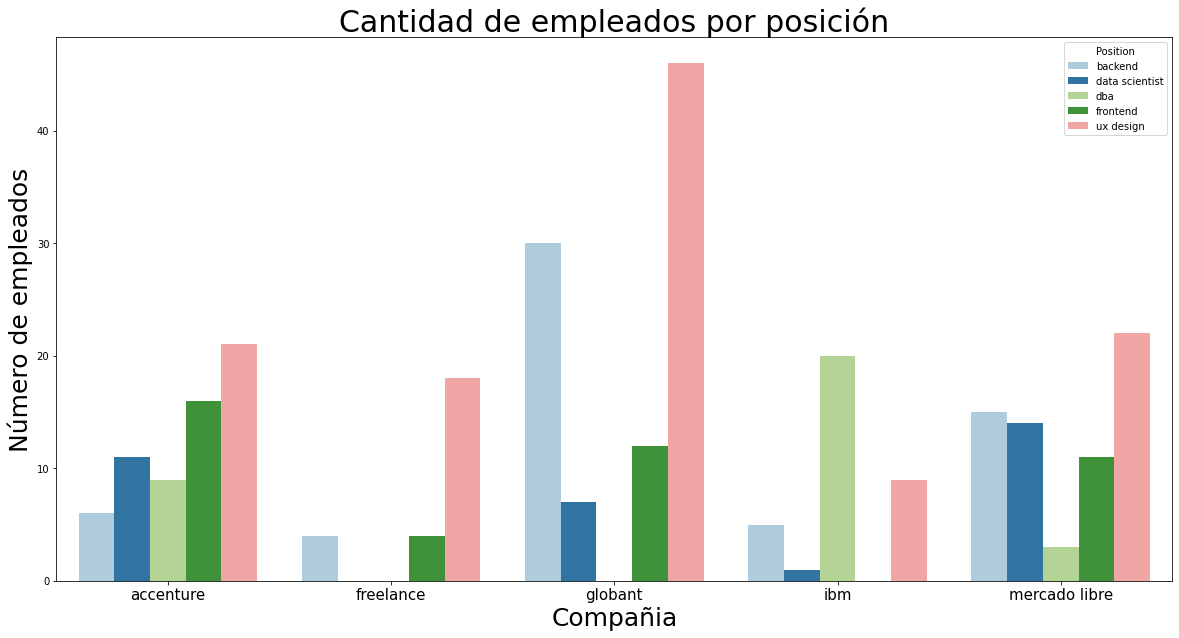

In [45]:
df_l=aux.groupby(["Company","Position"])

df_val_count = pd.DataFrame({'count' : aux.groupby( ["Company","Position"] ).size()}).reset_index()

df_val_count #N de empleados por seniority

fig,ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(x="Company", y="count", data=df_val_count,hue="Position",palette = "Paired")
ax.set_xlabel("Compañia",fontsize=25)
ax.set_ylabel("Número de empleados",fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0,fontsize=15)
ax.set_title("Cantidad de empleados por posición",fontsize=30)

In [55]:
data={'Position':['data scientist','data scientist','software developer','software developer','product manager','product manager','software architect','software architect'],
      'Average yearly salary (USD)':[10354.049841,138054.693561,15614.236822,132414.623681,11190.683373,148663.562166,15127.352447,140173.509075],
      'Country':['Argentina','USA','Argentina','USA','Argentina','USA','Argentina','USA']}

df_usa_arg=pd.DataFrame(data)
df_usa_arg

,Position,Average yearly salary (USD),Country
0,data scientist,10354.049841,Argentina
1,data scientist,138054.693561,USA
2,software developer,15614.236822,Argentina
3,software developer,132414.623681,USA
4,product manager,11190.683373,Argentina
5,product manager,148663.562166,USA
6,software architect,15127.352447,Argentina
7,software architect,140173.509075,USA


Text(0.5, 1.0, 'Comparación Salarios USA vs Argentina')

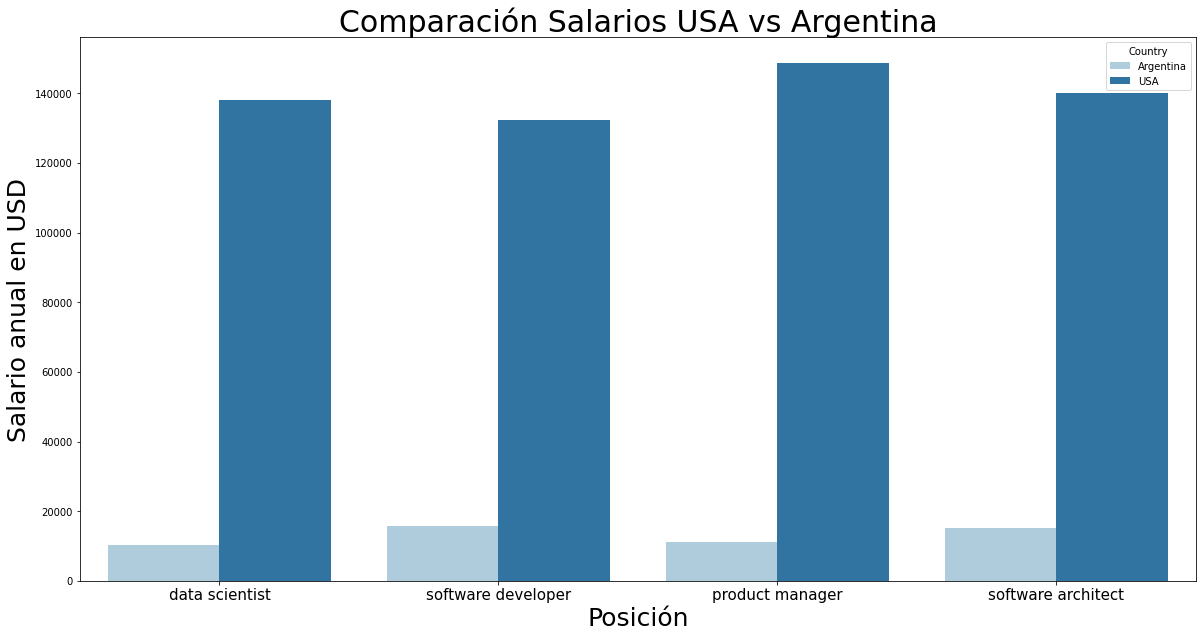

In [58]:
fig,ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(x="Position", y="Average yearly salary (USD)", hue='Country', data=df_usa_arg,palette = "Paired")
ax.set_xlabel("Posición",fontsize=25)
ax.set_ylabel("Salario anual en USD",fontsize=25)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0,fontsize=15)
ax.set_title("Comparación Salarios USA vs Argentina",fontsize=30)